## Problem Statement

For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers. 


These customer complaints are unstructured text data; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.


In this case study, you will be working as an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans. 

## Structure

- Data Reading/Data Understanding


- Data Cleaning


- Data Preprocessing


- Data Visualisation


- Feature Extraction


- Topic Modelling


- Model Building


- Model Inference

## Data Understanding

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install swifter
!pip install wordcloud matplotlib

In [ ]:
!pip install wordcloud

In [3]:
import sys
sys.path
!pip install --user wordcloud

### Importing the necessary libraries

In [4]:
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report


import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
f = open('complaints.json')
data = json.load(f)
df = pd.json_normalize(data)

In [6]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [7]:
df.shape

(78313, 22)

## Data Cleaning

**The following steps will be performed during data cleaning:**

- Convert text to lowercase

- Remove text within square brackets

- Remove punctuation

- Remove words containing numbers



**After completing these cleaning operations, proceed with the following steps:**

- Lemmatize the text

- Use POS tags to extract relevant words from the text

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [9]:
columns = df.columns
new_columns = [column.replace("_source.", "") for column in columns]
df.columns = new_columns
df.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [10]:
round(df.isna().sum()*100/len(df),2)

_index                        0.00
_type                         0.00
_id                           0.00
_score                        0.00
tags                         86.08
zip_code                      8.63
complaint_id                  0.00
issue                         0.00
date_received                 0.00
state                         2.54
consumer_disputed             0.00
product                       0.00
company_response              0.00
company                       0.00
submitted_via                 0.00
date_sent_to_company          0.00
company_public_response      99.99
sub_product                  13.50
timely                        0.00
complaint_what_happened       0.00
sub_issue                    59.12
consumer_consent_provided     1.29
dtype: float64

In [11]:
df = df.applymap(lambda x: 0 if pd.isnull(x) else x)

In [12]:
null_counts = df.isnull().sum()
null_counts

_index                       0
_type                        0
_id                          0
_score                       0
tags                         0
zip_code                     0
complaint_id                 0
issue                        0
date_received                0
state                        0
consumer_disputed            0
product                      0
company_response             0
company                      0
submitted_via                0
date_sent_to_company         0
company_public_response      0
sub_product                  0
timely                       0
complaint_what_happened      0
sub_issue                    0
consumer_consent_provided    0
dtype: int64

In [13]:
def clean_data(text):
    text = text.lower()  
    text = re.sub(r'\s\{\$[^\}]*\}', '', text)  
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\(\w*\)', '', text)  
    text = re.sub(r'[^\w\s]', ' ', text) 
    text = re.sub(r'\bx(/xx)*(/\d+)?\b', '', text)  
    text = re.sub(r'\b\d+\b', '', text) 
    text = re.sub(r' +', ' ', text).strip()  
    return text

In [14]:
df['clean_complaint']=df['complaint_what_happened'].astype(str)
df['clean_complaint']=df['complaint_what_happened'].apply(clean_data)

In [15]:
df.head()

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided,clean_complaint
0,complaint-public-v2,complaint,3211475,0.0,0,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,0,Credit card debt,Yes,,Debt is not yours,Consent not provided,
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,0,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help
2,complaint-public-v2,complaint,3199379,0.0,0,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,0,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided,i upgraded my xxxx xxxx card in xx xx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me
3,complaint-public-v2,complaint,2673060,0.0,0,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,0,Conventional home mortgage,Yes,,0,Consent not provided,
4,complaint-public-v2,complaint,3203545,0.0,0,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,0,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A,


## Data Preprocessing

In [16]:
nlp = spacy.load("en_core_web_sm")

def lemmatization(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc]
    lemmatized_str = " ".join(lemmatized)
    return lemmatized_str

In [17]:
df['lemmatized_complaint'] = df['clean_complaint'].apply(lemmatization)

In [18]:
df_clean = df[['complaint_what_happened', 'clean_complaint', 'lemmatized_complaint']]

In [19]:
df_clean.head()

,complaint_what_happened,clean_complaint,lemmatized_complaint
0,,,
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgraded my xxxx xxxx card in xx xx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xx xx and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx have the recording of the agent who be mislead I
3,,,
4,,,


In [20]:
def get_pos_tags(text):
    nn_words = []
    doc = nlp(text)
    for tok in doc:
        if tok.tag_ == 'NN':
            nn_words.append(tok.lemma_)
    nn_words_str = " ".join(nn_words)
    return nn_words_str

df_clean["POS_removed_complaint"] = df_clean.apply(lambda x: get_pos_tags(x['lemmatized_complaint']), axis=1)
df_clean['POS_removed_complaint'] = df_clean['POS_removed_complaint'].str.replace('xxxx','')

In [21]:
df_clean.head()

,complaint_what_happened,clean_complaint,lemmatized_complaint,POS_removed_complaint
0,,,,
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account advance help
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgraded my xxxx xxxx card in xx xx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xx xx and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent
3,,,,
4,,,,


## Data Visualisation

- Visualize the data based on the character length of the 'Complaint' column

- Generate word cloud to identify the top 40 most frequent words across all articles after text processing

- Determine the most frequent unigrams, bigrams, and trigrams across all complaints after text processing

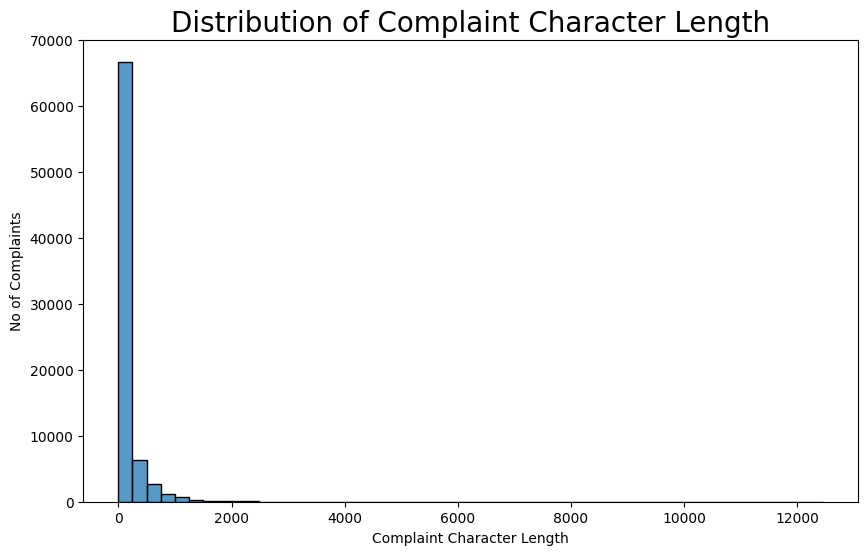

In [22]:
plt.figure(figsize=[10,6])
sns.histplot([len(x) for x in df_clean['POS_removed_complaint']], bins=50)
plt.title('Distribution of Complaint Character Length', fontsize=20)
plt.xlabel('Complaint Character Length', size=10)
plt.ylabel('No of Complaints', size=10)
plt.show()

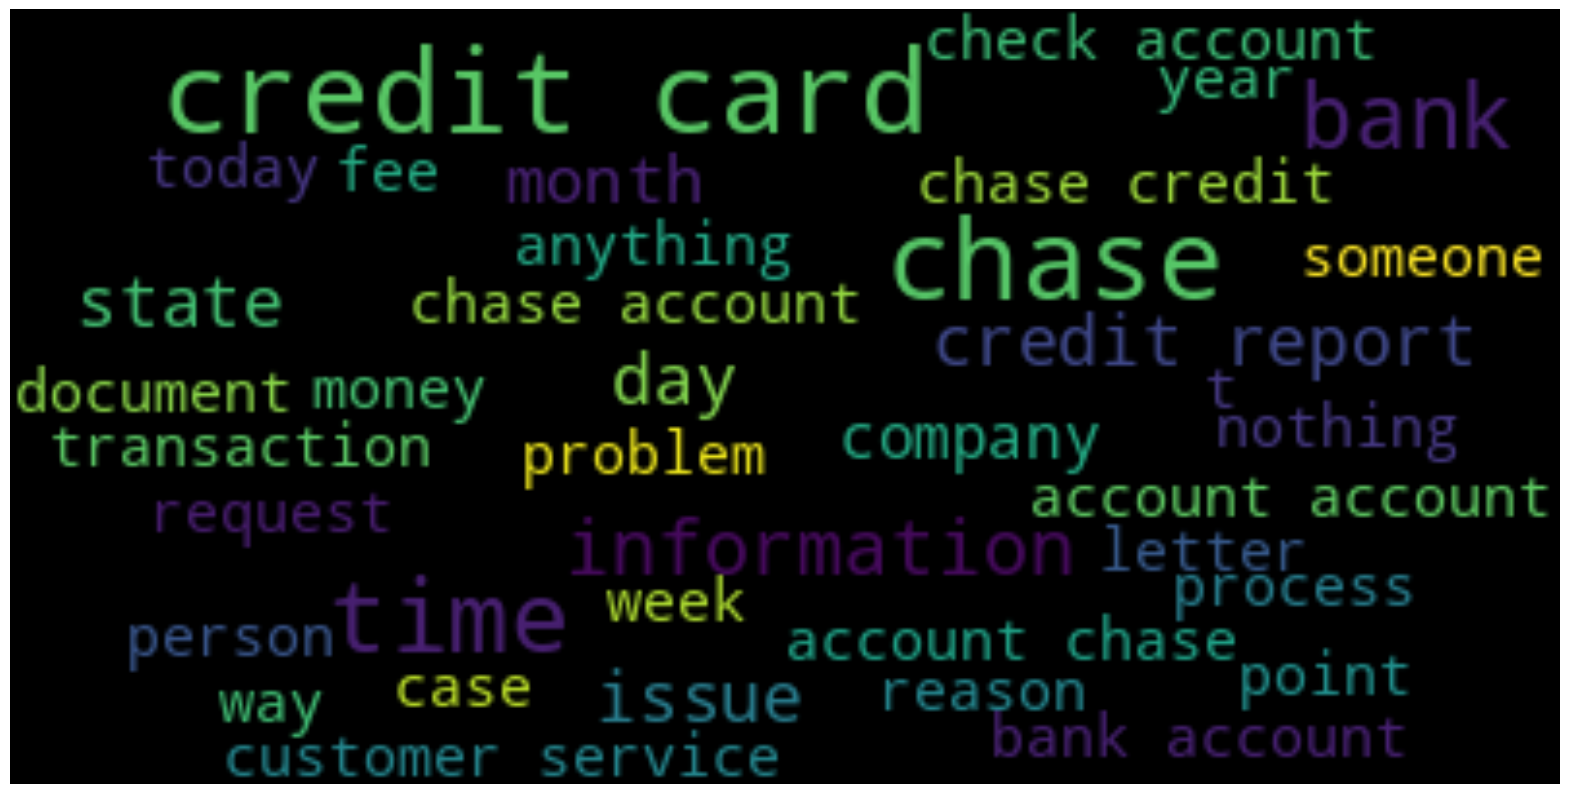

In [23]:
word_cloud = WordCloud(
    background_color='black',
    stopwords=set(STOPWORDS),
    max_font_size=30,
    max_words=38, 
    random_state=42
).generate(' '.join(df_clean['POS_removed_complaint']))

plt.figure(figsize=(20,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
def top_unigram(text, n=30):
    vector = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [25]:
top_common_words = top_unigram(df_clean['POS_removed_complaint'].values.astype('U'))
df_unigram = pd.DataFrame(top_common_words, columns = ['unigram' , 'count'])
df_unigram.head(10)

,unigram,count
0,chase,52135
1,account,46687
2,credit,33619
3,card,30206
4,payment,21356
5,bank,21194
6,time,16271
7,charge,14223
8,day,13268
9,check,12147


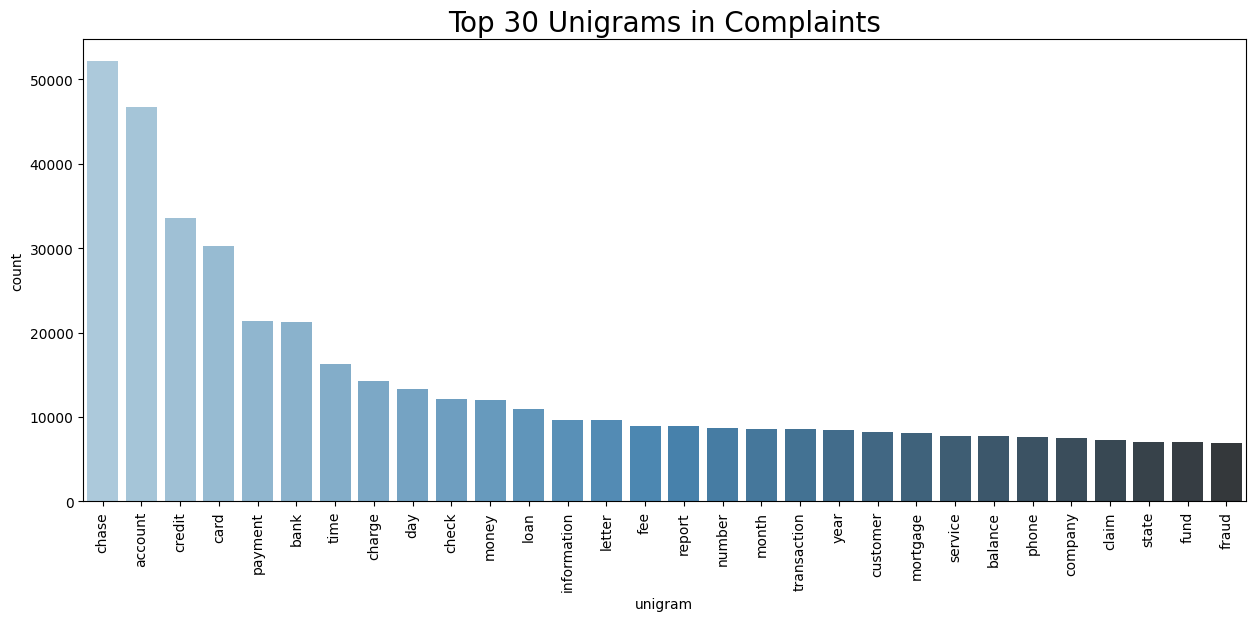

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df_unigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 Unigrams in Complaints", fontsize=20)
plt.show()

In [27]:
def top_bigram(text, n=30):
    vector = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [28]:
top_common_words = top_bigram(df_clean['POS_removed_complaint'].values.astype('U'))
df_bigram = pd.DataFrame(top_common_words, columns = ['bigram' , 'count'])
df_bigram.head(10)

,bigram,count
0,credit card,12915
1,credit report,3945
2,customer service,3060
3,account chase,3040
4,chase credit,2907
5,chase account,2629
6,account account,2444
7,bank account,2427
8,check account,2329
9,chase bank,2093


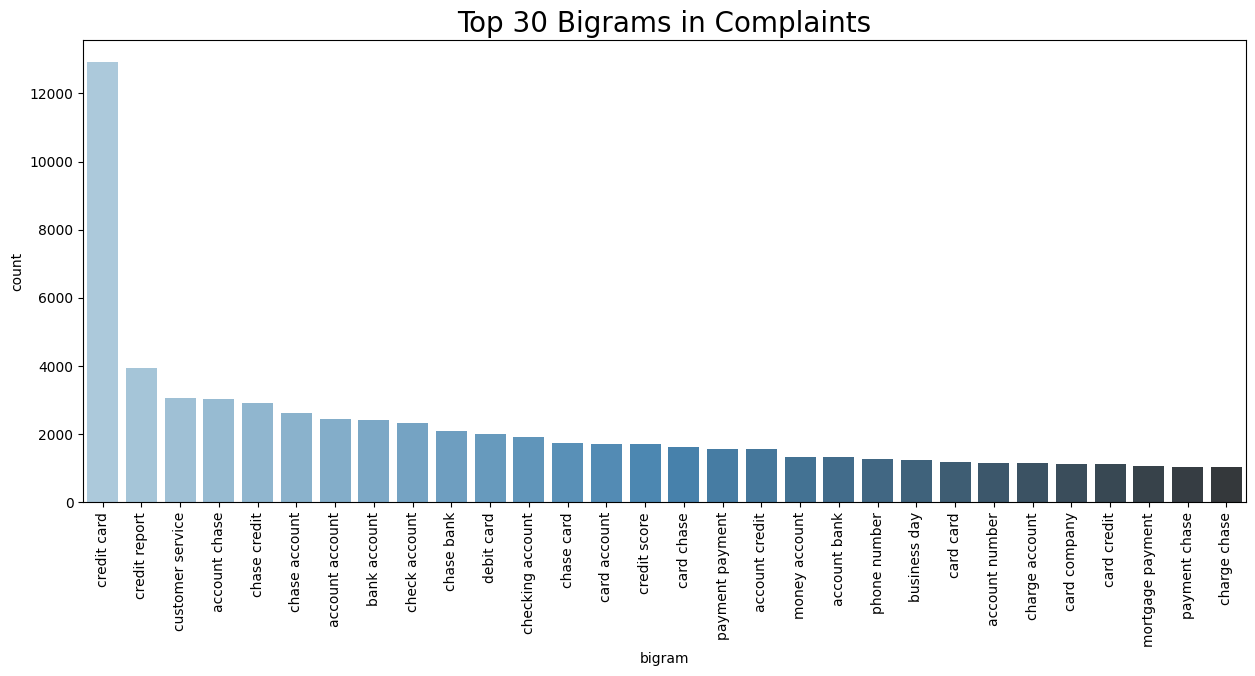

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df_bigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 Bigrams in Complaints", fontsize=20)
plt.show()

In [30]:
def top_trigram(text, n=30):
    vector = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [31]:
top_common_words = top_trigram(df_clean['POS_removed_complaint'].values.astype('U'))
df_trigram = pd.DataFrame(top_common_words, columns = ['trigram' , 'count'])
df_trigram.head(10)

,trigram,count
0,chase credit card,1965
1,credit card account,1112
2,credit card company,999
3,credit card chase,750
4,credit card credit,556
5,inquiry credit report,527
6,account credit card,438
7,card credit card,426
8,charge credit card,417
9,chase customer service,399


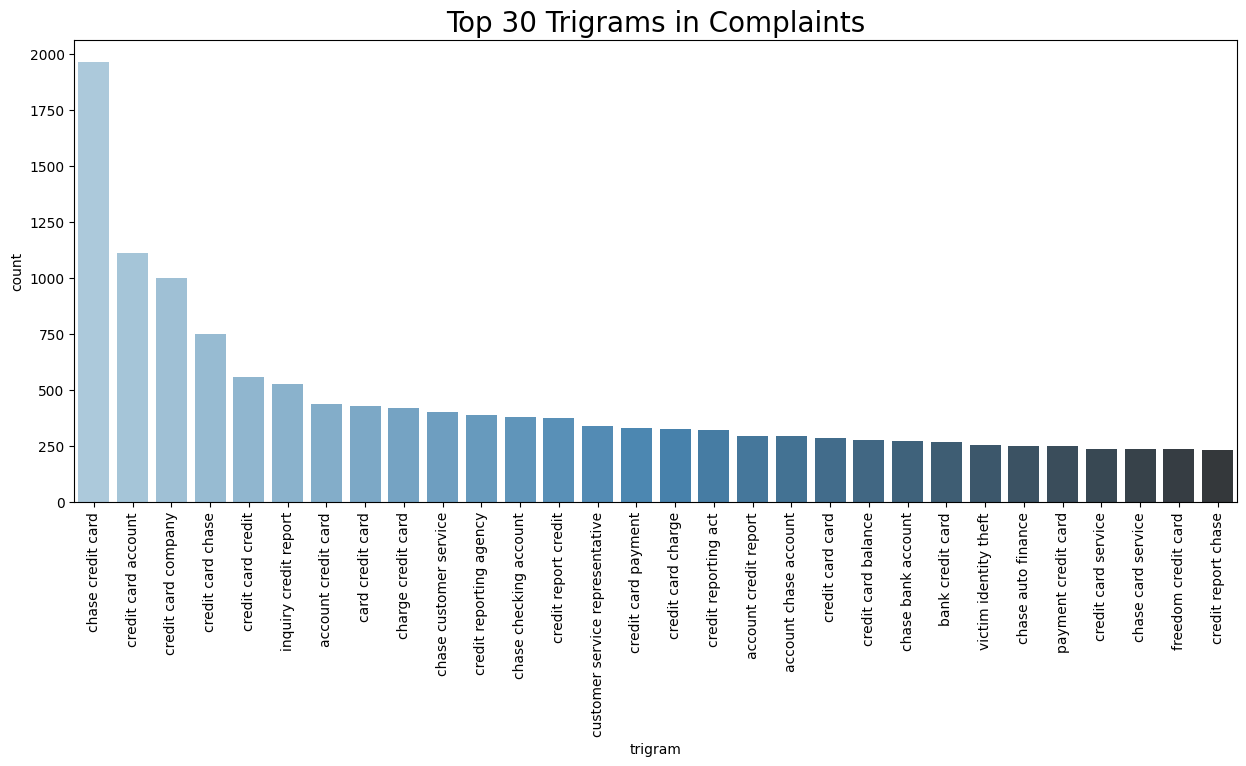

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df_trigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 Trigrams in Complaints", fontsize=20)
plt.show()

## Feature Extraction

In [33]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [34]:
dtm=tfidf.fit_transform(df_clean['POS_removed_complaint'])

## Topic Modelling

In [35]:
num_topics = 5

nmf_model = NMF(random_state=42, n_components=num_topics)

In [36]:
nmf_model.fit(dtm)
feature_names = tfidf.get_feature_names_out()
print(len(feature_names))

6393


In [37]:
words = np.array(tfidf.get_feature_names_out())
topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    idx = nmf_model.components_[i].argsort()[::-1][:15]
    topic_words_df.iloc[i] = words[idx]

topic_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,chase,fund,deposit,day,branch,transaction,number,checking,business,fee,claim
Topic 2,card,chase,charge,credit,dispute,transaction,fee,purchase,service,fraud,time,balance,merchant,customer,month
Topic 3,loan,chase,mortgage,home,modification,time,letter,year,property,document,information,rate,foreclosure,request,house
Topic 4,credit,report,inquiry,card,account,score,company,debt,information,reporting,limit,application,identity,letter,theft
Topic 5,payment,balance,month,fee,statement,time,day,auto,date,pay,year,mortgage,error,bank,car


In [38]:
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)

array([0, 0, 1, ..., 2, 4, 4])

In [39]:
df_clean['Topic'] = topic_results.argmax(axis=1)

In [40]:
df_clean.head()

,complaint_what_happened,clean_complaint,lemmatized_complaint,POS_removed_complaint,Topic
0,,,,,0
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account advance help,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgraded my xxxx xxxx card in xx xx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xx xx and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent,1
3,,,,,0
4,,,,,0


In [41]:
Topic_names = {0:'Account Services', 1:'Others', 2:'Mortgage/Loan', 3:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}

df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [42]:
df_clean

In [43]:
training_data = df_clean[['complaint_what_happened','Topic']]

In [44]:
training_data.shape

(78313, 2)

In [45]:
training_data['Topic'].value_counts()

Topic
Account Services               62974
Others                          5883
Mortgage/Loan                   4227
Credit card or prepaid card     3022
Theft/Dispute Reporting         2207
Name: count, dtype: int64

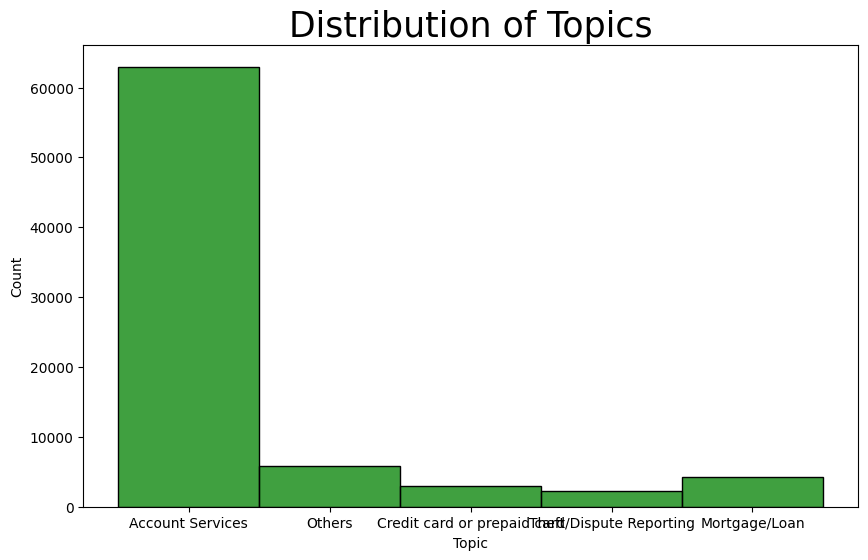

In [46]:
plt.figure(figsize=[10,6])
sns.histplot(data=training_data, x='Topic',color='Green',)
plt.title("Distribution of Topics", fontsize=25)
plt.show()

## Model Building

In [52]:
count_vector=CountVectorizer()
X_train_count=count_vector.fit_transform(training_data['complaint_what_happened'])

In [53]:
import pickle

pickle.dump(count_vector.vocabulary_, open("count_vector.pkl","wb"))

In [54]:
tfidf_transform= TfidfTransformer()
X_train_tfidf = tfidf_transform.fit_transform(X_train_count)

In [55]:
pickle.dump(tfidf_transform, open("tfidf.pkl","wb"))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.2, random_state=42)

In [57]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (62650, 29725)
y_train Shape: (62650,)
X_test Shape: (15663, 29725)
y_test Shape: (15663,)


#### 1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model_name = 'LOGISTIC REGRESSION'
lr = LogisticRegression() 
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [60]:
!pip install --user joblib --upgrade

  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
     |████████████████████████████████| 301 kB 12.3 MB/s eta 0:00:01


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Parameters for GridSearch
param_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# GridSearchCV without parallel processing
grid_lr = GridSearchCV(estimator=lr, 
                       param_grid=param_lr,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=1,  # Set to 1 to avoid parallel processing
                       cv=5)

# Fitting the model
grid_lr.fit(X_train, y_train)

# Printing the best parameters
print(grid_lr.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


lr = LogisticRegression(max_iter=1000)

param_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver':['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(estimator=lr, 
                       param_grid=param_lr,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=5)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)

In [62]:
# Setting up the tuned logistic regression model with best parameters found
lr_tuned = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000)

# Fitting the model
lr_tuned.fit(X_train, y_train)

# Making predictions
y_pred_lr_tuned = lr_tuned.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_lr_tuned))

                             precision    recall  f1-score   support

           Account Services       0.99      0.99      0.99     12487
Credit card or prepaid card       0.93      0.87      0.90       606
              Mortgage/Loan       0.93      0.89      0.91       890
                     Others       0.92      0.94      0.93      1194
    Theft/Dispute Reporting       0.95      0.86      0.90       486

                   accuracy                           0.98     15663
                  macro avg       0.94      0.91      0.93     15663
               weighted avg       0.98      0.98      0.98     15663



In [63]:
f1_lr = f1_score(y_test, y_pred_lr_tuned, average="weighted")
f1_lr

0.9751436058327003

In [64]:
def model_eval(y_true, y_pred, model_name='Model'):
    print(f"Evaluation Report for {model_name}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Confusion Matrix:\n{cm}")
    print(f"Weighted F1 Score: {f1:.4f}")
    return cm, f1

In [65]:
model_eval(y_test, y_pred_lr_tuned, model_name)

Evaluation Report for LOGISTIC REGRESSION
                             precision    recall  f1-score   support

           Account Services       0.99      0.99      0.99     12487
Credit card or prepaid card       0.93      0.87      0.90       606
              Mortgage/Loan       0.93      0.89      0.91       890
                     Others       0.92      0.94      0.93      1194
    Theft/Dispute Reporting       0.95      0.86      0.90       486

                   accuracy                           0.98     15663
                  macro avg       0.94      0.91      0.93     15663
               weighted avg       0.98      0.98      0.98     15663

Confusion Matrix:
[[12416    15    25    24     7]
 [   21   527     9    44     5]
 [   63     5   794    23     5]
 [   47    11     8  1123     5]
 [   31    10    16    11   418]]
Weighted F1 Score: 0.9751


(array([[12416,    15,    25,    24,     7],
        [   21,   527,     9,    44,     5],
        [   63,     5,   794,    23,     5],
        [   47,    11,     8,  1123,     5],
        [   31,    10,    16,    11,   418]]),
 0.9751436058327003)

In [66]:
f1_summary = pd.DataFrame([{'Model': 'Logistic Regression','F1 Score': round(f1_lr, 2)}])
f1_summary

,Model,F1 Score
0,Logistic Regression,0.98


#### 2. Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
model_name = 'DECISION TREE'
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt =dt.predict(X_test)

In [89]:

# Parameters for GridSearch
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25]
}

# GridSearchCV without parallel processing
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=param_dt,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=1,  # Set to 1 to avoid parallel processing
                       cv=5)

# Fitting the model
grid_dt.fit(X_train, y_train)

# Printing the best parameters
print(grid_dt.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}


param_dt = {
    'criterion': ['gini'],  
    'max_depth': [10, 20, 30],  
    'min_samples_leaf': [1, 5, 10] 
}

grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=param_dt,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=5)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

In [90]:
# Best parameters found
best_params = {
    'criterion': 'gini',
    'max_depth': 20,
    'min_samples_leaf': 10
}

# Setting up the tuned decision tree classifier
dt_tuned = DecisionTreeClassifier(criterion=best_params['criterion'], 
                                  max_depth=best_params['max_depth'], 
                                  min_samples_leaf=best_params['min_samples_leaf'])

# Fitting the model
dt_tuned.fit(X_train, y_train)

# Making predictions
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Evaluating the model
model_name = 'Decision Tree'
cm, f1_dt = model_eval(y_test, y_pred_dt_tuned, model_name)

Evaluation Report for Decision Tree
                             precision    recall  f1-score   support

           Account Services       0.98      0.99      0.98     12487
Credit card or prepaid card       0.75      0.71      0.73       606
              Mortgage/Loan       0.79      0.81      0.80       890
                     Others       0.81      0.80      0.80      1194
    Theft/Dispute Reporting       0.78      0.75      0.76       486

                   accuracy                           0.94     15663
                  macro avg       0.82      0.81      0.82     15663
               weighted avg       0.94      0.94      0.94     15663

Confusion Matrix:
[[12301    24    55    77    30]
 [   39   433    27    88    19]
 [   82    21   720    36    31]
 [   82    75    62   951    24]
 [   28    23    52    20   363]]
Weighted F1 Score: 0.9425


In [91]:
f1_dt = f1_score(y_test, y_pred_dt_tuned, average="weighted")
f1_dt

0.9425128859520244

In [92]:
model_eval(y_test, y_pred_dt_tuned, model_name)

Evaluation Report for Decision Tree
                             precision    recall  f1-score   support

           Account Services       0.98      0.99      0.98     12487
Credit card or prepaid card       0.75      0.71      0.73       606
              Mortgage/Loan       0.79      0.81      0.80       890
                     Others       0.81      0.80      0.80      1194
    Theft/Dispute Reporting       0.78      0.75      0.76       486

                   accuracy                           0.94     15663
                  macro avg       0.82      0.81      0.82     15663
               weighted avg       0.94      0.94      0.94     15663

Confusion Matrix:
[[12301    24    55    77    30]
 [   39   433    27    88    19]
 [   82    21   720    36    31]
 [   82    75    62   951    24]
 [   28    23    52    20   363]]
Weighted F1 Score: 0.9425


(array([[12301,    24,    55,    77,    30],
        [   39,   433,    27,    88,    19],
        [   82,    21,   720,    36,    31],
        [   82,    75,    62,   951,    24],
        [   28,    23,    52,    20,   363]]),
 0.9425128859520244)

In [93]:
f1_summary.loc[len(f1_summary.index)] = ['Decision Tree', round(f1_dt, 2)]
f1_summary

,Model,F1 Score
0,Logistic Regression,0.98
1,Decision Tree,0.94


#### 3. Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [95]:
model_name = 'RANDOM FOREST'
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [96]:
param_rf = {
    'n_estimators': [100, 200, 300],  
    'criterion': ['gini'], 
    'max_depth': [10, 20, 30],  
    'min_samples_leaf': [1, 5, 10] 
}

In [97]:
# GridSearchCV without parallel processing
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=param_rf,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=1,  # Set to 1 to avoid parallel processing
                       cv=5)

# Fitting the model
grid_rf.fit(X_train, y_train)

# Printing the best parameters
print(grid_rf.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 200}


In [98]:
rf_tuned = RandomForestClassifier(**grid_rf.best_params_)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [99]:
y_pred_rf_tuned = rf_tuned.predict(X_test)

In [100]:
f1_rf = f1_score(y_test, y_pred_rf_tuned, average="weighted")
print(f1_rf)
model_eval(y_test, y_pred_rf_tuned, model_name)

0.9194667309788188
Evaluation Report for RANDOM FOREST
                             precision    recall  f1-score   support

           Account Services       0.96      0.99      0.98     12487
Credit card or prepaid card       0.89      0.56      0.69       606
              Mortgage/Loan       0.82      0.74      0.78       890
                     Others       0.71      0.90      0.79      1194
    Theft/Dispute Reporting       0.97      0.16      0.28       486

                   accuracy                           0.93     15663
                  macro avg       0.87      0.67      0.70     15663
               weighted avg       0.93      0.93      0.92     15663

Confusion Matrix:
[[12405    10     6    65     1]
 [   70   341    25   170     0]
 [  145     7   660    77     1]
 [  115     7     1  1071     0]
 [  148    20   108   132    78]]
Weighted F1 Score: 0.9195


(array([[12405,    10,     6,    65,     1],
        [   70,   341,    25,   170,     0],
        [  145,     7,   660,    77,     1],
        [  115,     7,     1,  1071,     0],
        [  148,    20,   108,   132,    78]]),
 0.9194667309788188)

In [101]:
f1_summary.loc[len(f1_summary.index)] = ['Random Forest', round(f1_rf, 2)]
print(f1_summary)

                 Model  F1 Score
0  Logistic Regression      0.98
1        Decision Tree      0.94
2        Random Forest      0.92


#### 4. XGBoost

In [102]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [103]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Ensure X_train and y_train are numpy arrays or pandas dataframes/series
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

# Encode class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# XGBoost model
xgboost_model = xgb.XGBClassifier()

# Fitting the model
xgboost_model.fit(X_train, y_train_encoded)

# Making predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Decoding the predictions
y_pred_xgb_decoded = le.inverse_transform(y_pred_xgb)

# Evaluating the model
def model_eval(y_true, y_pred, model_name='Model'):
    print(f"Evaluation Report for {model_name}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Confusion Matrix:\n{cm}")
    print(f"Weighted F1 Score: {f1:.4f}")
    return cm, f1

# Example usage
model_name = 'XGBoost'
cm, f1_xgb = model_eval(y_test, y_pred_xgb_decoded, model_name)

Evaluation Report for XGBoost
                             precision    recall  f1-score   support

           Account Services       0.99      0.99      0.99     12487
Credit card or prepaid card       0.90      0.86      0.88       606
              Mortgage/Loan       0.91      0.90      0.91       890
                     Others       0.90      0.93      0.91      1194
    Theft/Dispute Reporting       0.91      0.88      0.89       486

                   accuracy                           0.97     15663
                  macro avg       0.92      0.91      0.92     15663
               weighted avg       0.97      0.97      0.97     15663

Confusion Matrix:
[[12406    12    22    35    12]
 [   14   522     5    57     8]
 [   34    13   804    26    13]
 [   31    21    22  1111     9]
 [   11    13    26    10   426]]
Weighted F1 Score: 0.9748


model_name = 'XGBOOST'

xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

In [104]:
param_xgb = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20],  
    'learning_rate': [0.05, 0.1],  
    'min_child_weight': [1, 5],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

grid_xgb = GridSearchCV(estimator=xgboost,
                        param_grid=param_xgb,
                        verbose=1,
                        scoring='f1_weighted',
                        n_jobs=-1,
                        cv=5)
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_)

In [109]:
f1_summary.loc[len(f1_summary.index)] = ['XGBoost', round(f1_xgb, 2)]
print(f1_summary)

                 Model  F1 Score
0  Logistic Regression      0.98
1        Decision Tree      0.94
2        Random Forest      0.92
3              XGBoost      0.97


**As per the F1 score of all the 4 models, Logistic Regression performs best with F1 score : 0.975**

## Model Inference

In [74]:
pickle.dump(lr_tuned, open("logreg_model.pkl", "wb"))

In [84]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Load vectorizer and models once
with open("count_vector.pkl", "rb") as f:
    vocabulary = pickle.load(f)
    load_vec = CountVectorizer(vocabulary=vocabulary)
with open("tfidf.pkl", "rb") as f:
    load_tfidf = pickle.load(f)
with open("logreg_model.pkl", "rb") as f:
    load_model = pickle.load(f)

# Ensure Topic_names match the order of classes in the model
Topic_names = ["Account Services", "Others", "Mortgage/Loan", "Credit card or prepaid card", "Theft/Dispute Reporting"]

def topic_predicter(text):
    X_new_count = load_vec.transform(text)
    X_new_tfidf = load_tfidf.transform(X_new_count)
    prediction = load_model.predict(X_new_tfidf)

    print(f"Prediction: {prediction}")  # Debug print to check the prediction value

    if prediction[0] in Topic_names:
        return prediction[0]
    else:
        raise ValueError(f"Unexpected prediction value: {prediction[0]}")

# Define the test DataFrame
df_complaints = pd.DataFrame({
    'complaints': [
        "The transaction history on my credit card statement seems incorrect. Can someone help clarify?",
        "My account was unexpectedly locked. I need immediate access to my funds.",
        "I received a notification about a suspicious login attempt on my account. What should I do?",
        "I need assistance with setting up online banking for my new account.",
        "How can I change the PIN for my debit card through the mobile app?",
        "The ATM did not dispense cash, but my account was debited. Please resolve this issue."
    ]
})

# Apply the topic predictor function to each complaint
df_complaints['predict_topic'] = df_complaints['complaints'].apply(lambda x: topic_predicter([x]))

# Display the DataFrame with predictions
print(df_complaints)

Prediction: ['Others']
Prediction: ['Account Services']
Prediction: ['Account Services']
Prediction: ['Account Services']
Prediction: ['Others']
Prediction: ['Account Services']
                                                                                       complaints   
0  The transaction history on my credit card statement seems incorrect. Can someone help clarify?  \
1                        My account was unexpectedly locked. I need immediate access to my funds.   
2     I received a notification about a suspicious login attempt on my account. What should I do?   
3                            I need assistance with setting up online banking for my new account.   
4                              How can I change the PIN for my debit card through the mobile app?   
5           The ATM did not dispense cash, but my account was debited. Please resolve this issue.   

      predict_topic  
0            Others  
1  Account Services  
2  Account Services  
3  Account Services  
4   

In [86]:
df_complaints

,complaints,predict_topic
0,The transaction history on my credit card statement seems incorrect. Can someone help clarify?,Others
1,My account was unexpectedly locked. I need immediate access to my funds.,Account Services
2,I received a notification about a suspicious login attempt on my account. What should I do?,Account Services
3,I need assistance with setting up online banking for my new account.,Account Services
4,How can I change the PIN for my debit card through the mobile app?,Others
5,"The ATM did not dispense cash, but my account was debited. Please resolve this issue.",Account Services


**Conclusion: Logistic Regression model is predicting well on custom data**